In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup
import requests
import math

In [10]:
v_spec = pd.read_csv('vehicle_spec')

In [11]:
v_spec.drop(['Unnamed: 0'], axis=1, inplace=True)
v_spec

,Brand,Model,Battery,0 - 100,Top Speed,Range,Efficiency,Fastcharge,Price(German)
0,Nissan,Leaf,37.0,7.9,144,225,164,230.0,29990.0
1,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860.0,186336.0
2,Nissan,e-NV200 Evalia,37.0,14.0,123,170,218,170.0,43730.0
3,Nissan,Leaf e+,56.0,7.3,157,325,172,390.0,37550.0
4,BMW,i3 120 Ah,37.9,7.3,150,235,161,270.0,39000.0
...,...,...,...,...,...,...,...,...,...
167,Peugeot,e-208,45.0,8.1,150,285,158,460.0,31950.0
168,Peugeot,e-2008 SUV,45.0,8.5,150,255,176,410.0,35450.0
169,Opel,Corsa-e,45.0,8.1,150,285,158,460.0,29900.0
170,Opel,Mokka-e,45.0,9.2,150,255,176,410.0,34110.0


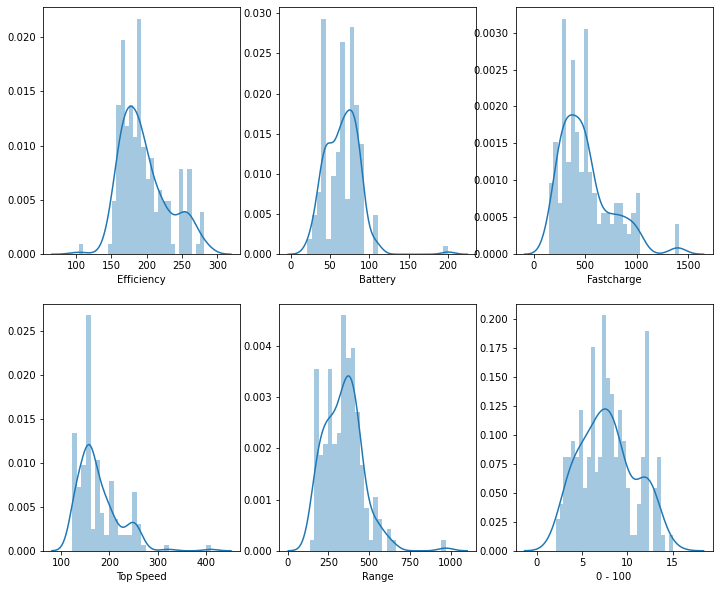

In [12]:
fig,axes = plt.subplots(2,3, figsize=(12,10))
sns.distplot(v_spec['Efficiency'],ax=axes[0,0],bins=30)
sns.distplot(v_spec['Battery'],ax=axes[0,1],bins=30)
sns.distplot(v_spec['Fastcharge'],ax=axes[0,2],bins=30)
sns.distplot(v_spec['Top Speed'],ax=axes[1,0],bins=30)
sns.distplot(v_spec['Range'],ax=axes[1,1],bins=30)
sns.distplot(v_spec['0 - 100'],ax=axes[1,2],bins=30)

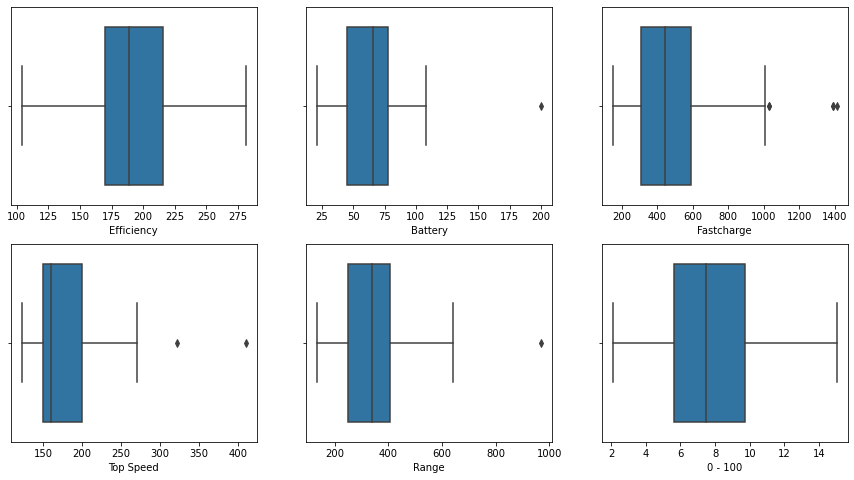

In [13]:
fig,axes = plt.subplots(2,3, figsize=(15,8))

sns.boxplot(v_spec['Efficiency'],ax=axes[0,0])
sns.boxplot(v_spec['Battery'],ax=axes[0,1])
sns.boxplot(v_spec['Fastcharge'],ax=axes[0,2])
sns.boxplot(v_spec['Top Speed'],ax=axes[1,0])
sns.boxplot(v_spec['Range'],ax=axes[1,1])
sns.boxplot(v_spec['0 - 100'],ax=axes[1,2])

### Outliers Detection

In [14]:
# Computing IQR (Interquartile Range)
maximum =[]
for i in v_spec.columns[2:]:
    q75, q25 = np.percentile(v_spec[i].values,[75,25])
    iqr = q75 - q25
    maximum.append(int(q75 + 1.5*iqr))

In [15]:
# Battery Outliers 
for i in range(len(v_spec['Battery'])):
    if v_spec['Battery'].iloc[i] > maximum[0]:
        print('Vehicle {} is an outlier with Battery of {}'.format(v_spec['Model'].iloc[i], v_spec['Battery'].iloc[i]))

Vehicle Roadster  is an outlier with Battery of 200.0


In [16]:
# Top Speed Outliers
for i in range(len(v_spec['Top Speed'])):
    if v_spec['Top Speed'].iloc[i] > maximum[2]:
        print('Vehicle {} is an outlier with Top Speed of {}'.format(v_spec['Model'].iloc[i], v_spec['Top Speed'].iloc[i]))

Vehicle Roadster  is an outlier with Top Speed of 410
Vehicle Model S Plaid is an outlier with Top Speed of 322


In [17]:
# Range Outliers
for i in range(len(v_spec['Range'])):
    if v_spec['Range'].iloc[i] > maximum[3]:
        print('Vehicle {} is an outlier with Range of {}'.format(v_spec['Model'].iloc[i], v_spec['Range'].iloc[i]))

Vehicle Roadster  is an outlier with Range of 970


In [18]:
# Fastcharge Outliers
for i in range(len(v_spec['Fastcharge'])):
    if v_spec['Fastcharge'].iloc[i] > maximum[5]:
        print('Vehicle {} is an outlier with Fastcharge of {}'.format(v_spec['Model'].iloc[i], v_spec['Fastcharge'].iloc[i]))

Vehicle Air Grand Touring is an outlier with Fastcharge of 1390.0
Vehicle Air Touring is an outlier with Fastcharge of 1390.0
Vehicle Air Pure is an outlier with Fastcharge of 1410.0
Vehicle e-tron GT quattro is an outlier with Fastcharge of 1030.0
Vehicle EV6 Long Range 2WD is an outlier with Fastcharge of 1030.0


In [23]:
# Price Outliers
for i in range(len(v_spec['Price(German)'])):
    if v_spec['Price(German)'].iloc[i] > maximum[-1]:
        print('Vehicle {} is an outlier with Price of {}'.format(v_spec['Model'].iloc[i], v_spec['Price(German)'].iloc[i]))

Vehicle Taycan Turbo S is an outlier with Price of 186336.0
Vehicle e-tron GT RS is an outlier with Price of 138200.0
Vehicle One  is an outlier with Price of 149000.0
Vehicle Roadster  is an outlier with Price of 215000.0
Vehicle Taycan Turbo is an outlier with Price of 153016.0
Vehicle Taycan 4S Plus is an outlier with Price of 113008.0
Vehicle Air Grand Touring is an outlier with Price of 140000.0
Vehicle Model S Plaid is an outlier with Price of 126990.0
Vehicle Model X Plaid is an outlier with Price of 116990.0
Vehicle Taycan 4S Cross Turismo is an outlier with Price of 111842.0
Vehicle Taycan Turbo Cross Turismo is an outlier with Price of 154444.0
Vehicle Taycan Turbo S Cross Turismo is an outlier with Price of 187746.0
Vehicle EQS 580 4MATIC is an outlier with Price of 135529.0
Vehicle EQS AMG 53 4MATIC+ is an outlier with Price of 175000.0
Vehicle Taycan GTS is an outlier with Price of 131834.0
Vehicle Taycan GTS Sport Turismo is an outlier with Price of 132786.0


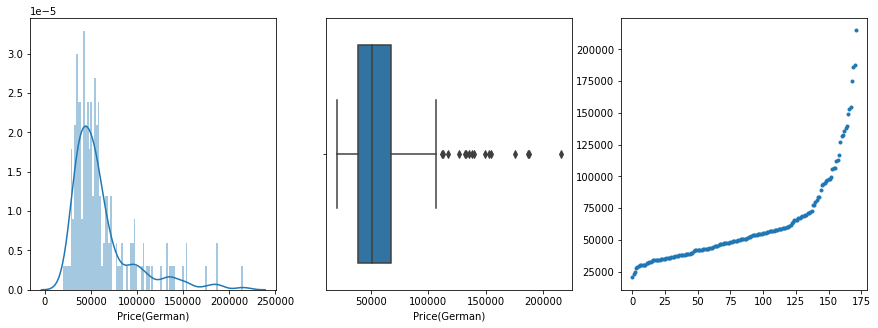

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))


sns.distplot(v_spec['Price(German)'], bins = 100, ax=ax[0])
#There are many outliers for the Prie - Luxury or Sports-based EV are likely to be more expensive than typical EV
sns.boxplot(v_spec['Price(German)'], ax = ax[1])
#Visualizing the Price Trend
ax[2].plot(sorted(v_spec['Price(German)'].values), '.')

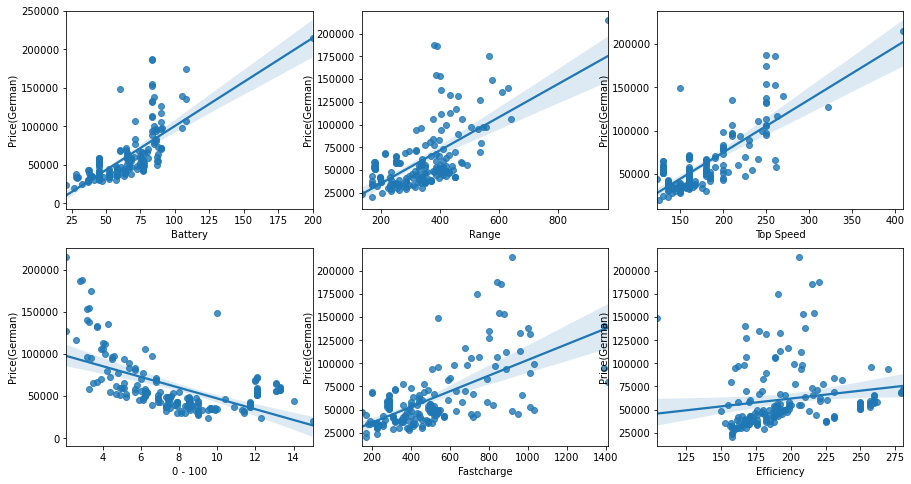

In [31]:
# Visualizing Regression plot with respect to Price 
fig,axes = plt.subplots(2,3, figsize=(15,8))

sns.regplot(x=v_spec['Battery'],y=v_spec['Price(German)'],data=v_spec,ax=axes[0,0])
sns.regplot(x=v_spec['Range'],y=v_spec['Price(German)'],data=v_spec,ax=axes[0,1])
sns.regplot(x=v_spec['Top Speed'],y=v_spec['Price(German)'],data=v_spec,ax=axes[0,2])
sns.regplot(x=v_spec['0 - 100'],y=v_spec['Price(German)'],data=v_spec,ax=axes[1,0])
sns.regplot(x=v_spec['Fastcharge'],y=v_spec['Price(German)'],data=v_spec,ax=axes[1,1])
sns.regplot(x=v_spec['Efficiency'],y=v_spec['Price(German)'],data=v_spec,ax=axes[1,2])

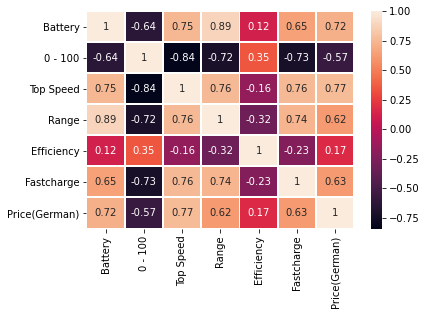

In [32]:
# Visualizing Correlation between Features
sns.heatmap(v_spec.corr(),annot=True, lw=1)

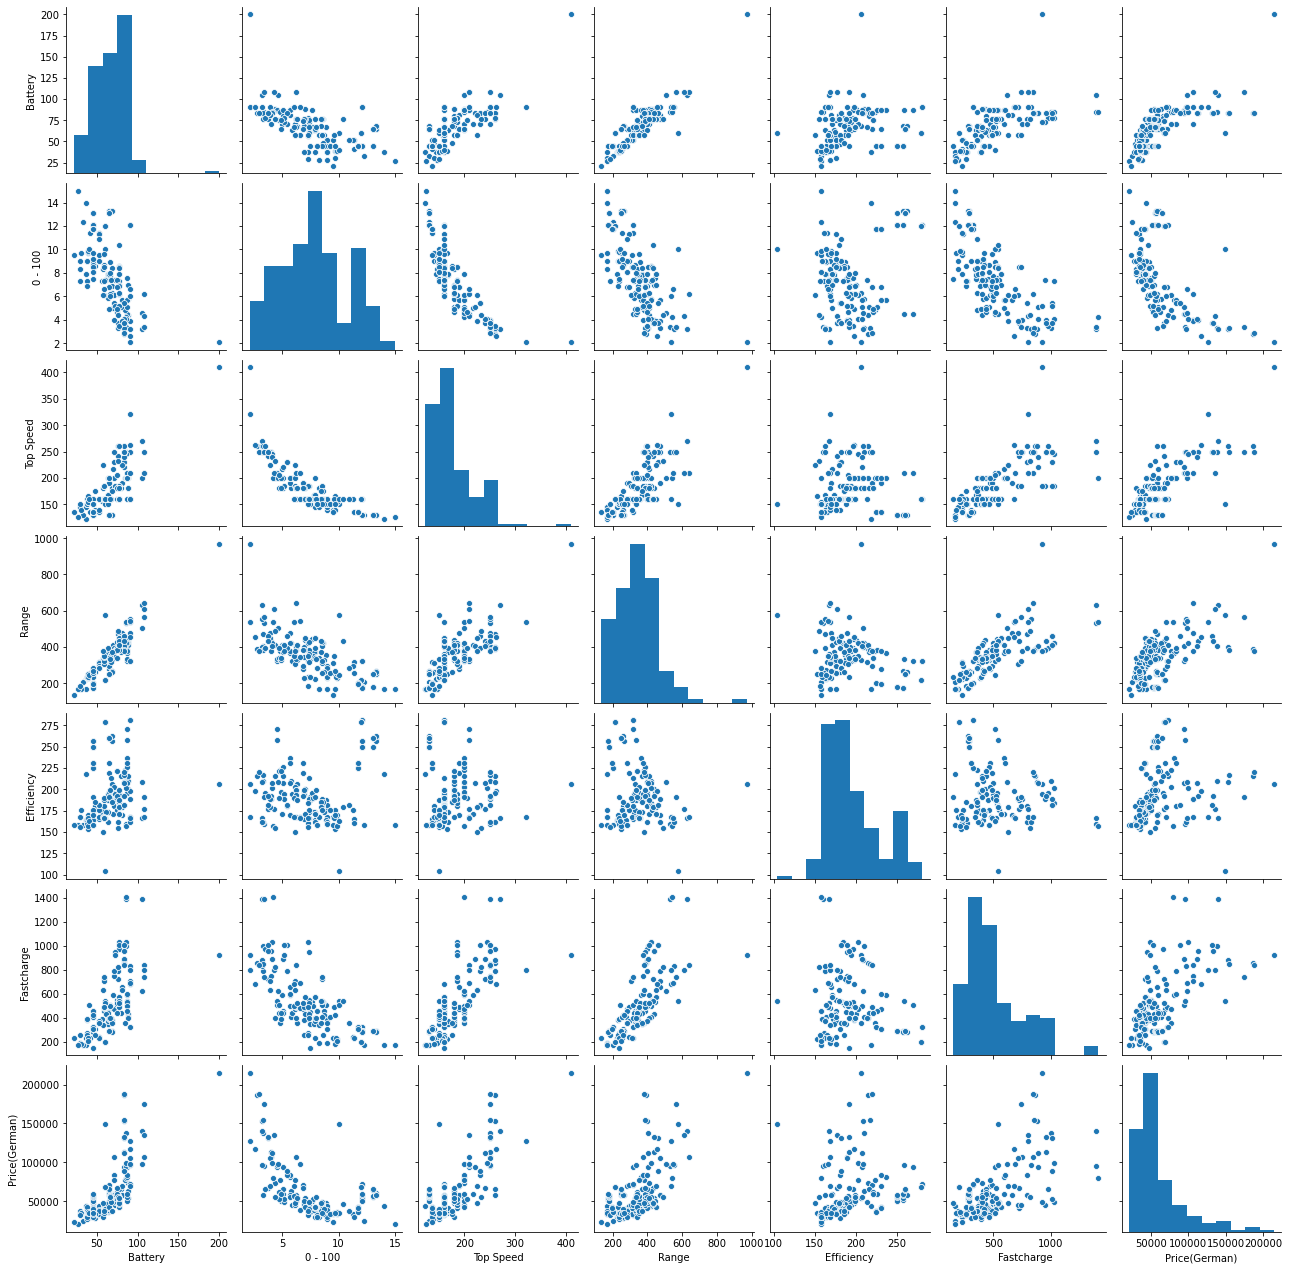

In [34]:
sns.pairplot(v_spec)